<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/OpenCVFaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OpenCV face recognition

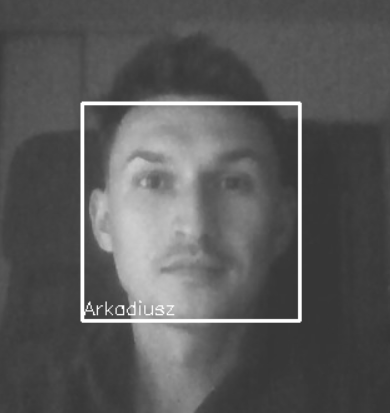

In [2]:
!pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Capture images

In [ ]:
import os
import pyttsx3
import cv2 as cv

# Określa ustawienia dla instrukcji dźwiękowych.
engine = pyttsx3.init()
engine.setProperty('rate', 145)
engine.setProperty('volume', 1.0)  # Maksymalna wartość to 1.0.

# Określa ścieżkę do klasyfikatorów kaskadowych Haara biblioteki OpenCV.
path = '/content/drive/MyDrive/Projekty/OpenCV Face Recognition/haarcascade_frontalface_default.xml'
face_detector = cv.CascadeClassifier(path)

# Przygotowuje kamerę.
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Nie mozna uruchomic urzadzenia wideo.")
cap.set(3, 640)  # Szerokość klatki
cap.set(4, 480)  # Wysokość klatki

# Przekazuje instrukcje.
# engine.say("Enter your data when you receive the message on the screen.")
# engine.runAndWait()
name = input("\nEnter your name: ")
user_id = input("Enter your ID: ")
print("\nLook into the camera")

# Tworzy katalog do przechowywania obrazów.
if not os.path.isdir('trainer'):
    os.mkdir('trainer')
os.chdir('trainer')

frame_count = 0

while True:
    # Pozyskuje obrazy klatka po klatce (w sumie 30 klatek).
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    face_rects = face_detector.detectMultiScale(gray, scaleFactor=1.2,
                                                minNeighbors=5)
    for (x, y, w, h) in face_rects:
        frame_count += 1
        cv.imwrite(str(name) + '.' + str(user_id) + '.'
                   + str(frame_count) + '.jpg', gray[y:y + h, x:x + w])
        cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Najlepiej mieć otwarty katalog z miniaturami.
        cv.imshow('image', frame)
        cv.waitKey(400)
    if frame_count >= 30:
        break

print("\nFinished downloading images. Exiting the program...")
cap.release()
cv.destroyAllWindows()


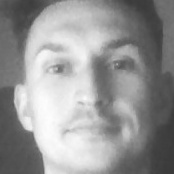
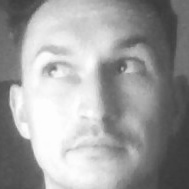

##Train

Processing training data: file Arkadiusz.1.1.jpg


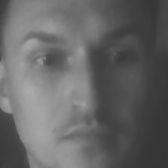

Processing training data: file Arkadiusz.1.30.jpg


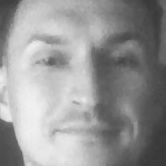

Processing training data: file Arkadiusz.1.22.jpg


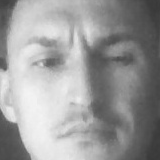

Processing training data: file Arkadiusz.1.29.jpg


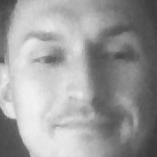

Processing training data: file Arkadiusz.1.28.jpg


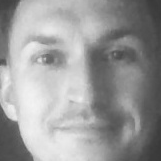

Processing training data: file Arkadiusz.1.27.jpg


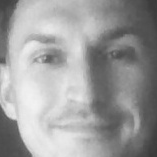

Processing training data: file Arkadiusz.1.24.jpg


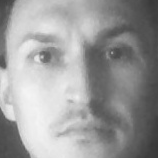

Processing training data: file Arkadiusz.1.26.jpg


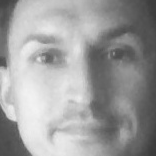

Processing training data: file Arkadiusz.1.25.jpg


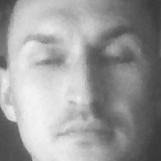

Processing training data: file Arkadiusz.1.23.jpg


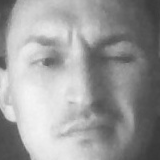

Processing training data: file Arkadiusz.1.21.jpg


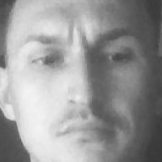

Processing training data: file Arkadiusz.1.19.jpg


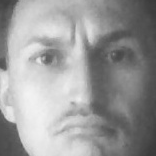

Processing training data: file Arkadiusz.1.20.jpg


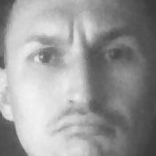

Processing training data: file Arkadiusz.1.18.jpg


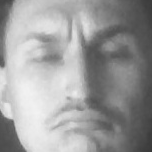

Processing training data: file Arkadiusz.1.16.jpg


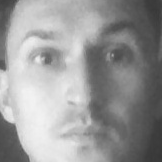

Processing training data: file Arkadiusz.1.17.jpg


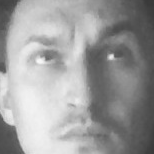

Processing training data: file Arkadiusz.1.14.jpg


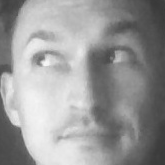

Processing training data: file Arkadiusz.1.13.jpg


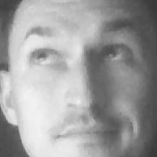

Processing training data: file Arkadiusz.1.12.jpg


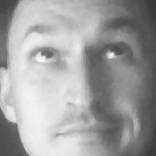

Processing training data: file Arkadiusz.1.15.jpg


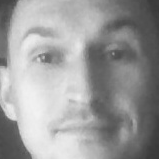

Processing training data: file Arkadiusz.1.11.jpg


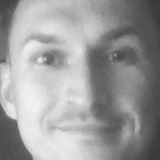

Processing training data: file Arkadiusz.1.10.jpg


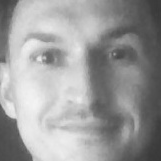

Processing training data: file Arkadiusz.1.9.jpg


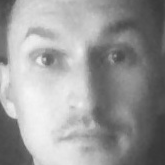

Processing training data: file Arkadiusz.1.8.jpg


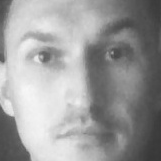

Processing training data: file Arkadiusz.1.7.jpg


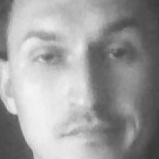

Processing training data: file Arkadiusz.1.6.jpg


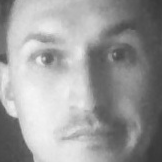

Processing training data: file Arkadiusz.1.5.jpg


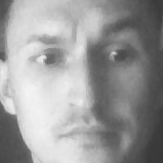

Processing training data: file Arkadiusz.1.2.jpg


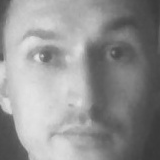

Processing training data: file Arkadiusz.1.4.jpg


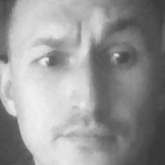

Processing training data: file Arkadiusz.1.3.jpg


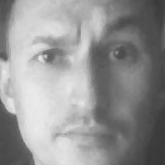

Training finished.


In [12]:
import os
import numpy as np
# import cv2 as cv
from google.colab.patches import cv2_imshow

# Ustawia ścieżkę do kaskadowych klasyfikatorów Haara do wykrywania twarzy.
cascade_path = "/content/drive/MyDrive/Projekty/OpenCV Face Recognition/"
face_detector = cv.CascadeClassifier(cascade_path +
                                     'haarcascade_frontalface_default.xml')

# Ustawia ścieżkę do obrazów szkoleniowych oraz przygotowuje słownik nazwisk i etykiet.
train_path = '/content/drive/MyDrive/Projekty/OpenCV Face Recognition/trainer'

image_paths = [os.path.join(train_path, f) for f in os.listdir(train_path)]
images, labels = [], []

# Znajduje prostokąty z twarzami i przypisuje im etykiety w postaci liczb.
for image in image_paths:
    train_image = cv.imread(image, cv.IMREAD_GRAYSCALE)
    label = int(os.path.split(image)[-1].split('.')[1])
    name = os.path.split(image)[-1].split('.')[0]
    frame_num = os.path.split(image)[-1].split('.')[2]
    faces = face_detector.detectMultiScale(train_image)
    for (x, y, w, h) in faces:
        images.append(train_image[y:y + h, x:x + w])
        labels.append(label)
        print(f"Processing training data: file {name}.{label}"
              f".{frame_num}.jpg")
        cv2_imshow(train_image[y:y + h, x:x + w])

cv.destroyAllWindows()

# Przeprowadza szkolenie algorytmu.
recognizer = cv.face.LBPHFaceRecognizer_create()
recognizer.train(images, np.array(labels))
recognizer.write('lbph_trainer.yml')
print("Training finished.")


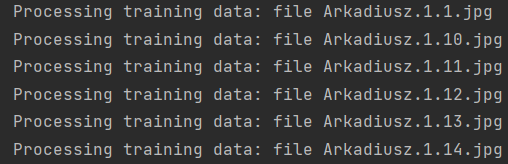

##Predict

In [ ]:
import os
from datetime import datetime
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Nie można uruchomić kamery")
cap.set(3, 640) #Szerokość klatki
cap.set(4, 480) #Wysokość klatki

names = {1: "Arek", 2:"Doma", 3:"Papiez"}
cascade_path = "/content/drive/MyDrive/Projekty/OpenCV Face Recognition/"
face_detector = cv.CascadeClassifier(cascade_path + 'haarcascade_frontalface_default.xml')

recognizer = cv.face.LBPHFaceRecognizer_create()
recognizer.read('lbph_trainer.yml')

test_path = '/content/drive/MyDrive/Projekty/OpenCV Face Recognition/test'
image_paths = [os.path.join(test_path, f) for f in os.listdir(test_path)]

frame_count = 0

while True:
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5)

    for (x, y, w, h) in faces:
        frame_count += 1
        face = cv.resize(gray[y:y+h, x:x+w], (100, 100))
        predicted_id, dist = recognizer.predict(face)
        if dist <= 1000:
        # if predicted_id == 1 and dist <= 70:
            name = names[predicted_id]
            print("Person in the picture: {} (odległość = {})".format(name, round(dist,1)))
        else:
            name = "Not recognized"
            print(f"Person in the picture: {name}")

        cv.rectangle(gray, (x, y), (x+w, y+h), 255, 2)
        cv.putText(gray, name,(x+1, y+h-5), cv.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
        cv.imshow('ID', gray)
        cv.waitKey(2000)

cap.release()
cv.destroyAllWindows()

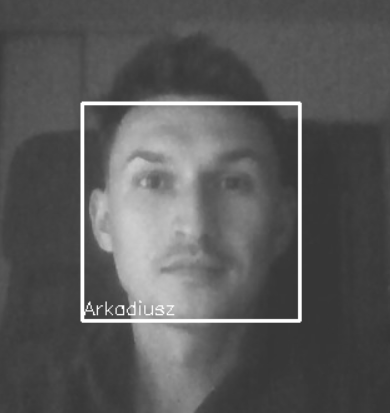